Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
import joblib
from google.colab import files
uploaded = files.upload()

Saving heart+disease.zip to heart+disease (1).zip


Load and Read Dataset

In [2]:
zip_file = "heart+disease.zip"




with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    df = pd.read_csv(zip_ref.open('processed.cleveland.data'), header=None)


df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.replace('?', np.nan, inplace=True)

for col in ['ca', 'thal']:
    df[col] = df[col].astype(float)


df.dropna(inplace=True)



In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [6]:
df['target'] = df['target'].apply(lambda x: 1 if int(x) > 0 else 0)
df['target'].value_counts()


,count
target,
0,160
1,137


In [7]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,1.0,1.0,0.750380,-0.276443,1.0,2.0,0.017494,0.0,1.068965,3.0,-0.721976,6.0,0
1,1.378929,1.0,4.0,1.596266,0.744555,0.0,2.0,-1.816334,1.0,0.381773,2.0,2.478425,3.0,1
2,1.378929,1.0,4.0,-0.659431,-0.353500,0.0,2.0,-0.899420,1.0,1.326662,2.0,1.411625,7.0,1
3,-1.941680,1.0,3.0,-0.095506,0.051047,0.0,0.0,1.633010,0.0,2.099753,3.0,-0.721976,3.0,0
4,-1.498933,0.0,2.0,-0.095506,-0.835103,0.0,2.0,0.978071,0.0,0.295874,1.0,-0.721976,3.0,0


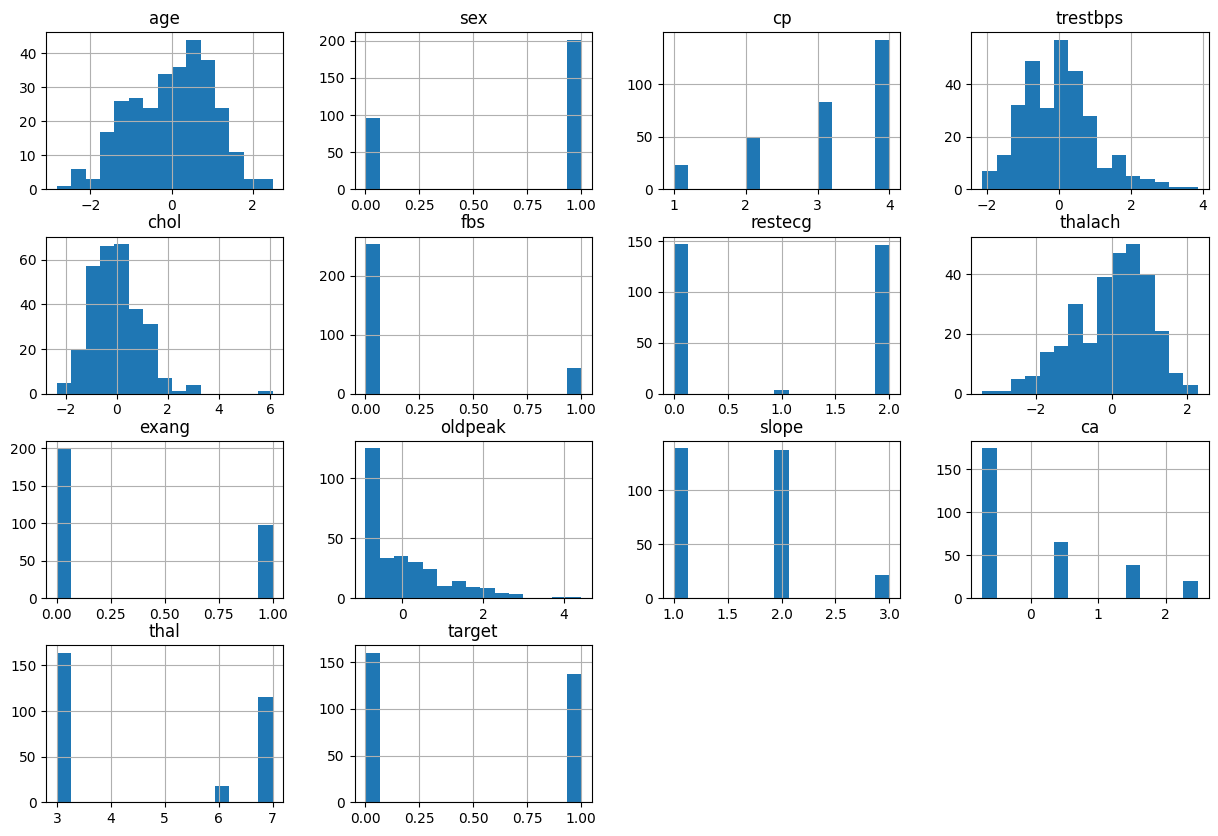

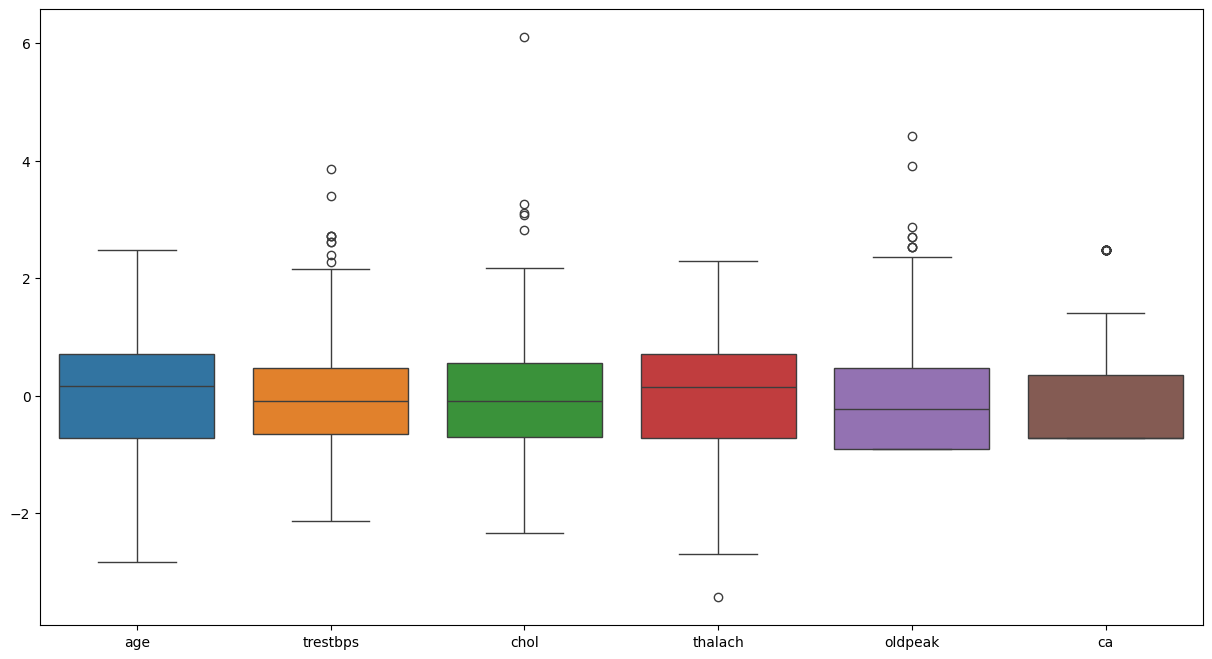

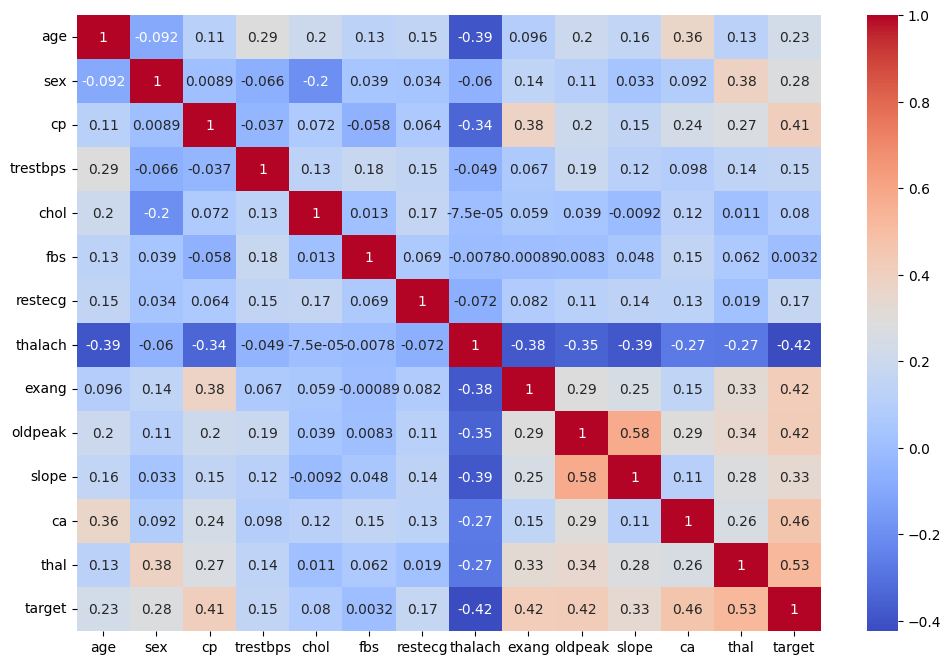

In [8]:
df.hist(bins=15, figsize=(15,10))
plt.show()


plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols])
plt.show()


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


PCA (Principal Component Analysis)

In [9]:
X = df.drop('target', axis=1)
y = df['target']


In [10]:

pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


print("Explained variance ratio (first 10 components):", explained_variance[:10])


Explained variance ratio (first 10 components): [0.35533497 0.14458904 0.0948988  0.07740526 0.07121903 0.06228744
 0.05801129 0.05269423 0.03349338 0.01636619]


Feature Selection

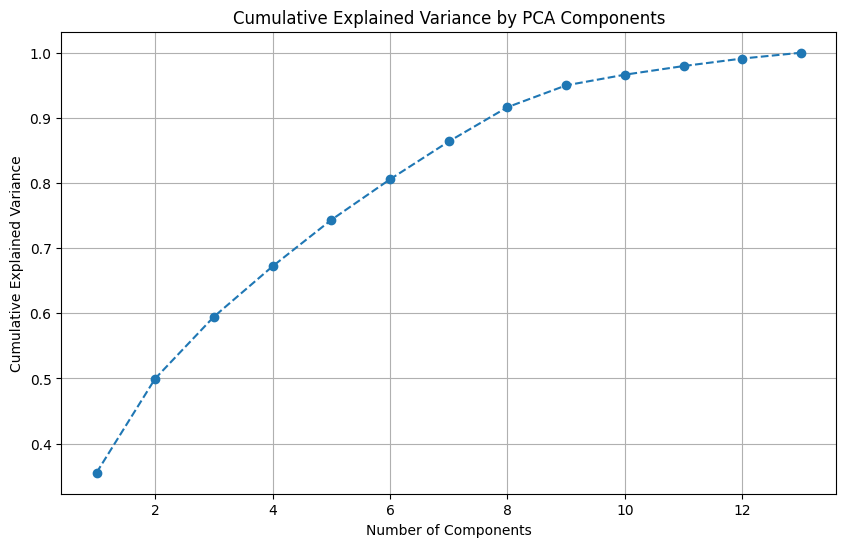

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [12]:
pca_95 = PCA(n_components=0.95)
X_reduced = pca_95.fit_transform(X)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_reduced.shape[1])


Original number of features: 13
Reduced number of features: 10


Random Forest

thalach     0.123176
thal        0.120980
cp          0.119219
ca          0.117524
oldpeak     0.105544
age         0.101294
trestbps    0.074835
chol        0.072463
exang       0.053397
slope       0.048968
sex         0.031521
restecg     0.021432
fbs         0.009647
dtype: float64


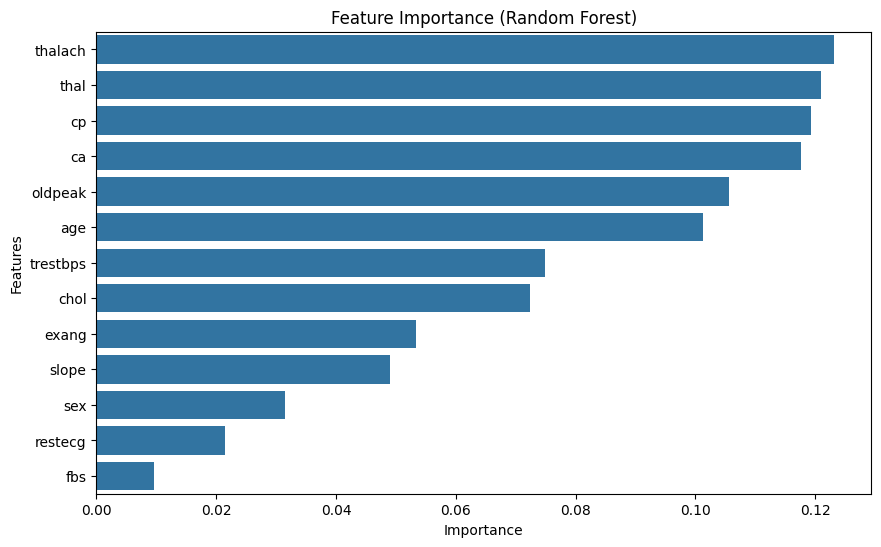

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


print(feature_importances)


plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Recursive Feature Elimination (RFE)

In [14]:
lr = LogisticRegression(max_iter=1000)


rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)


selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features)


Selected features by RFE: Index(['sex', 'cp', 'trestbps', 'fbs', 'thalach', 'exang', 'slope', 'ca'], dtype='object')


 Chi-Square Test

In [15]:
X_scaled = MinMaxScaler().fit_transform(X)

chi_scores = chi2(X_scaled, y)[0]
chi2_results = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)

print("Chi-Square scores:\n", chi2_results)


Chi-Square scores:
 thal        44.569861
exang       35.508090
ca          27.576871
oldpeak     11.059763
slope       10.409290
sex          7.444195
cp           7.117477
restecg      4.067326
thalach      2.717718
age          1.019542
trestbps     0.550683
chol         0.097053
fbs          0.002547
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


Train Test

In [17]:
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Model Training

In [18]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    }

results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.833333   0.888889  0.666667  0.761905  0.924769
Decision Tree        0.683333   0.586207  0.708333  0.641509  0.687500
Random Forest        0.850000   0.800000  0.833333  0.816327  0.908565
SVM                  0.883333   1.000000  0.708333  0.829268  0.920139


ROC Visualization

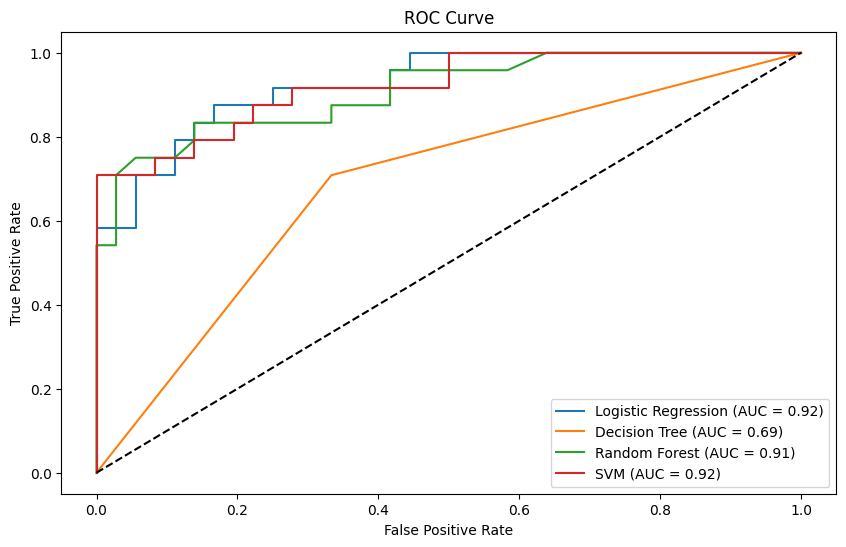

In [19]:
plt.figure(figsize=(10,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


K-Means Clustering

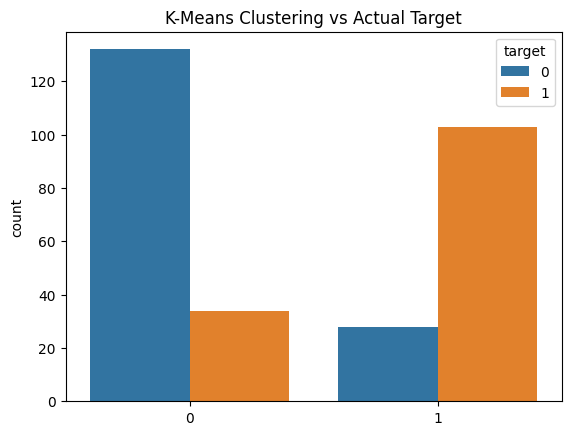

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_selected)


sns.countplot(x=clusters_kmeans, hue=y)
plt.title('K-Means Clustering vs Actual Target')
plt.show()


Hierarchical Clustering

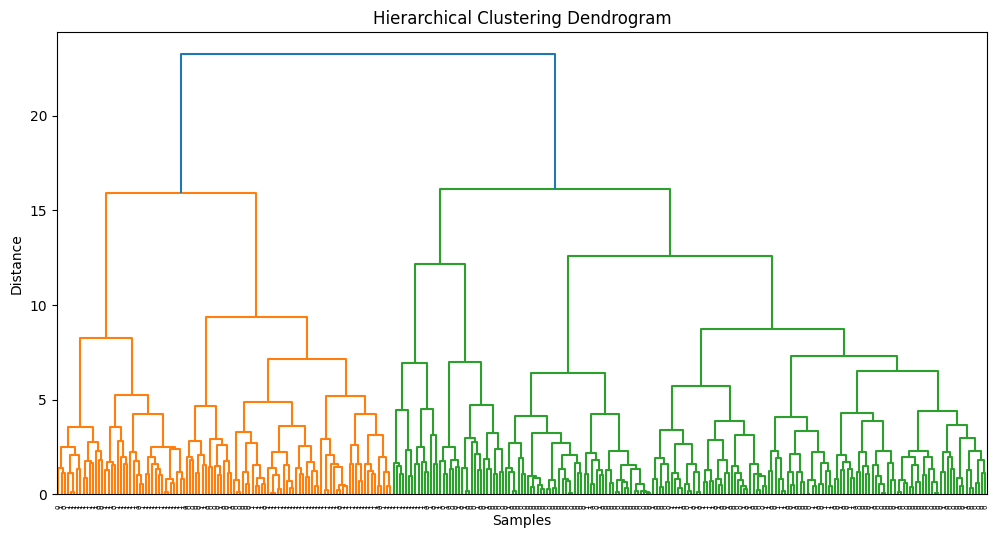

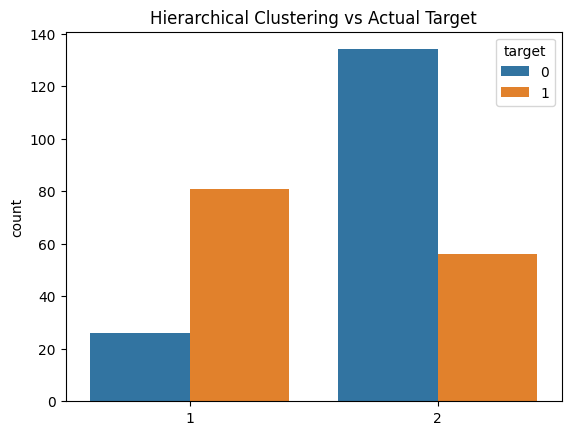

In [21]:
linked = linkage(X_selected, method='ward')


plt.figure(figsize=(12,6))
dendrogram(linked, labels=y.values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


clusters_hier = fcluster(linked, 2, criterion='maxclust')


sns.countplot(x=clusters_hier, hue=y)
plt.title('Hierarchical Clustering vs Actual Target')
plt.show()


GridSearchCV

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best ROC-AUC: 0.8756930171277997


RandomizedSearchCV

In [23]:
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters (SVM):", random_search.best_params_)
print("Best ROC-AUC (SVM):", random_search.best_score_)


Best Parameters (SVM): {'C': np.float64(8.424426408004217), 'gamma': 'auto', 'kernel': 'linear'}
Best ROC-AUC (SVM): 0.8745981554677208


In [27]:
import os

os.makedirs('models', exist_ok=True)

final_model = grid_search.best_estimator_
joblib.dump(final_model, 'models/final_model.pkl')

print("Model saved as models/final_model.pkl")


Model saved as models/final_model.pkl
